### Coursera Capstone Project ###
#### Battle of Neighborhoods ####

In [1]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


! pip install requests
! pip install html5lib
! pip install bs4


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup
from sklearn.cluster import KMeans

import folium
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    altair-4.0.0               |             py_0         606 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be 

In [2]:
# Download the data for New York
!wget -q -O 'ny_data.json' https://cocl.us/new_york_dataset
print('Data download complete.')
with open('ny_data.json') as json_data:
    ny_data = json.load(json_data)
ny_data


Data download complete.


{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [3]:
# All the relevant data is in the features key, which has a list of the neighborhoods. Define a new variable that has only this data.
neighborhoods_data = ny_data['features']



In [4]:
# Check the first item in the new dataframe
neighborhoods_data[0]


{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [5]:
# Transform data to a pandas dataframe. Firs create an empty dataframe
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [6]:
# Check the empty dataframe to confirm that the columns are as expected
neighborhoods



,Borough,Neighborhood,Latitude,Longitude


In [7]:
# Loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [8]:
# Check the firt 5 rows in the dataframe
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [9]:
# Check the datframe shape
neighborhoods.shape

(306, 4)

In [10]:
# Get the geographical coordinates of New York city
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [11]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [13]:
# Create a dataframe for neighborhoods in Manhattan
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [14]:
#Geographical coordinates for Manhaattan
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [15]:
# create new map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [16]:
 #Start utilizing the Foursquare API to explore the neighborhoods.
CLIENT_ID = '05EZWQWUD4WT5QCEJ5ETHQ2QUGCHKOWQSGKJ5MWN2QRSCE1R'
CLIENT_SECRET = '23UK1DFI1RJ0EOJB2W3PQPXJBZEW2YS5YUQMQCYMERNUBXMM'
VERSION = '20191201' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [17]:
# Explore the first neighborhood in the dataframe.
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


In [18]:
# Let's create the GET request URL.
radius = 500
limit = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, limit)
url

'https://api.foursquare.com/v2/venues/explore?client_id=05EZWQWUD4WT5QCEJ5ETHQ2QUGCHKOWQSGKJ5MWN2QRSCE1R&client_secret=23UK1DFI1RJ0EOJB2W3PQPXJBZEW2YS5YUQMQCYMERNUBXMM&ll=40.87655077879964,-73.91065965862981&v=20191201&radius=500&limit=100'

In [19]:
#Send the GET request and examine the results
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e14c041923935001b13e01e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Marble Hill',
  'headerFullLocation': 'Marble Hill, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 26,
  'suggestedBounds': {'ne': {'lat': 40.88105078329964,
    'lng': -73.90471933917806},
   'sw': {'lat': 40.87205077429964, 'lng': -73.91659997808156}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b4429abf964a52037f225e3',
       'name': "Arturo's",
       'location': {'address': '5198 Broadway',
        'crossStreet': 'at 225th St.',
        'lat': 40.87441177110231,
        'lng': -73.91027100981574,
        'labeledLatLngs': [{'label'

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


In [22]:
# Number of venues returned by FourSquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

26 venues were returned by Foursquare.


In [23]:
# Create a function to repeat the same process to all the neighborhoods in Manhattan
LIMIT = 100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
# Code to run the above function on each neighborhood and create a new dataframe called manhattan_venues.
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [26]:
# Check the size of the resulting dataframe
print(manhattan_venues.shape)
manhattan_venues.head()

(3313, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
1,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop
4,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop


In [27]:
# Let's check how many venues were returned for each neighborhood
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,97,97,97,97,97,97
Carnegie Hill,100,100,100,100,100,100
Central Harlem,44,44,44,44,44,44
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,43,43,43,43,43,43
East Village,100,100,100,100,100,100


In [28]:
# Let's find out how many unique categories can be curated from all the returned venues
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 337 uniques categories.


In [29]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant

In [30]:
# And let's examine the new dataframe size.
manhattan_onehot.shape

(3313, 338)

In [31]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

,Neighborhood,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Christmas Market,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music School,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoor Supply Store,Outdoors & Recreation,Paella Restaurant,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant

In [32]:
# Let's confirm the new size
manhattan_grouped.shape

(40, 338)

In [33]:
# print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Battery Park City----
         venue  freq
0         Park  0.07
1        Hotel  0.05
2  Coffee Shop  0.05
3    Wine Shop  0.03
4          Gym  0.03


----Carnegie Hill----
            venue  freq
0     Coffee Shop  0.06
1     Pizza Place  0.05
2  Cosmetics Shop  0.04
3     Yoga Studio  0.03
4       Bookstore  0.03


----Central Harlem----
                 venue  freq
0       Cosmetics Shop  0.07
1   Chinese Restaurant  0.05
2                  Bar  0.05
3   African Restaurant  0.05
4  American Restaurant  0.05


----Chelsea----
                venue  freq
0         Coffee Shop  0.06
1              Bakery  0.05
2      Ice Cream Shop  0.04
3  Italian Restaurant  0.04
4             Theater  0.03


----Chinatown----
                 venue  freq
0   Chinese Restaurant  0.09
1         Cocktail Bar  0.05
2  American Restaurant  0.04
3               Bakery  0.04
4         Optical Shop  0.03


----Civic Center----
                  venue  freq
0    Italian Restaurant  0.05
1  Gym / Fitness C

In [34]:
# First, let's write a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
# Create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Wine Shop,Boat or Ferry,Pizza Place,Gift Shop,Cupcake Shop
1,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Yoga Studio,Bakery,Café,Bookstore,Grocery Store,Gym,Bar
2,Central Harlem,Cosmetics Shop,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Bar,Art Gallery,Seafood Restaurant,Gym / Fitness Center,Boutique
3,Chelsea,Coffee Shop,Bakery,Ice Cream Shop,Italian Restaurant,Nightclub,American Restaurant,Hotel,Theater,Bookstore,French Restaurant
4,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Salon / Barbershop,Hotpot Restaurant,Optical Shop,Spa,Boutique,Bubble Tea Shop


In [36]:
# Use k-means to cluster the neighborhood into 5 clusters.
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([3, 1, 1, 1, 1, 0, 0, 4, 4, 3], dtype=int32)

In [37]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Coffee Shop,Sandwich Place,American Restaurant,Yoga Studio,Pizza Place,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Deli / Bodega
1,Manhattan,Chinatown,40.715618,-73.994279,1,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Salon / Barbershop,Hotpot Restaurant,Optical Shop,Spa,Boutique,Bubble Tea Shop
2,Manhattan,Washington Heights,40.851903,-73.936900,4,Café,Bakery,Grocery Store,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Gym,Spanish Restaurant,Supplement Shop,Mexican Restaurant
3,Manhattan,Inwood,40.867684,-73.921210,4,Mexican Restaurant,Pizza Place,Restaurant,Bakery,Café,Lounge,Park,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant
4,Manhattan,Hamilton Heights,40.823604,-73.949688,4,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,Bakery,Park,Sandwich Place,Cocktail Bar,School


In [38]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [39]:
# Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.
# Cluster 1
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Manhattanville,Coffee Shop,Seafood Restaurant,Park,Mexican Restaurant,Italian Restaurant,Japanese Curry Restaurant,Lounge,Bank,Bar,Chinese Restaurant
8,Upper East Side,Italian Restaurant,Exhibit,Bakery,Art Gallery,Coffee Shop,Juice Bar,Gym / Fitness Center,French Restaurant,Hotel,Boutique
13,Lincoln Square,Theater,Café,Concert Hall,Italian Restaurant,Plaza,Gym / Fitness Center,Performing Arts Venue,French Restaurant,Indie Movie Theater,American Restaurant
14,Clinton,Theater,Italian Restaurant,Gym / Fitness Center,American Restaurant,Coffee Shop,Sandwich Place,Gym,Spa,Wine Shop,Hotel
18,Greenwich Village,Italian Restaurant,Clothing Store,Sushi Restaurant,Café,Indian Restaurant,Seafood Restaurant,French Restaurant,Dessert Shop,Cocktail Bar,Sandwich Place
21,Tribeca,American Restaurant,Park,Italian Restaurant,Café,Men's Store,Wine Shop,Wine Bar,Greek Restaurant,Spa,Coffee Shop
24,West Village,Italian Restaurant,New American Restaurant,Cosmetics Shop,Park,Wine Bar,American Restaurant,Cocktail Bar,Jazz Club,Coffee Shop,Theater
27,Gramercy,Bar,Italian Restaurant,Pizza Place,Bagel Shop,Thai Restaurant,Diner,Comedy Club,Mexican Restaurant,Coffee Shop,Cocktail Bar
31,Noho,Italian Restaurant,Cocktail Bar,Pizza Place,French Restaurant,Gift Shop,Mexican Restaurant,Rock Club,Coffee Shop,Art Gallery,Grocery Store
32,Civic Center,Gym / Fitness Center,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Yoga Studio,Sandwich Place,Cocktail Bar,Park,American Restaurant


In [40]:
# Cluster 2
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Cocktail Bar,American Restaurant,Bakery,Salon / Barbershop,Hotpot Restaurant,Optical Shop,Spa,Boutique,Bubble Tea Shop
6,Central Harlem,Cosmetics Shop,Chinese Restaurant,African Restaurant,American Restaurant,French Restaurant,Bar,Art Gallery,Seafood Restaurant,Gym / Fitness Center,Boutique
10,Lenox Hill,Italian Restaurant,Coffee Shop,Pizza Place,Cocktail Bar,Sushi Restaurant,Burger Joint,Café,Gym,Gym / Fitness Center,Sporting Goods Shop
12,Upper West Side,Italian Restaurant,Coffee Shop,Wine Bar,Bar,Bakery,Café,Yoga Studio,Pub,Pizza Place,Middle Eastern Restaurant
15,Midtown,Hotel,Theater,Coffee Shop,Sporting Goods Shop,Clothing Store,Japanese Restaurant,Bookstore,Food Truck,Bakery,Steakhouse
16,Murray Hill,Sandwich Place,Coffee Shop,Japanese Restaurant,American Restaurant,Hotel,Italian Restaurant,Chinese Restaurant,Gym / Fitness Center,Gym,Bar
17,Chelsea,Coffee Shop,Bakery,Ice Cream Shop,Italian Restaurant,Nightclub,American Restaurant,Hotel,Theater,Bookstore,French Restaurant
22,Little Italy,Bakery,Italian Restaurant,Café,Sandwich Place,Pizza Place,Mediterranean Restaurant,Salon / Barbershop,Bubble Tea Shop,Cocktail Bar,Clothing Store
23,Soho,Clothing Store,Boutique,Art Gallery,Women's Store,Shoe Store,Mediterranean Restaurant,Sporting Goods Shop,Italian Restaurant,Bakery,Men's Store
30,Carnegie Hill,Coffee Shop,Pizza Place,Cosmetics Shop,Yoga Studio,Bakery,Café,Bookstore,Grocery Store,Gym,Bar


In [41]:
# Cluster 3
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Stuyvesant Town,Boat or Ferry,Park,Bar,German Restaurant,Gym / Fitness Center,Cocktail Bar,Basketball Court,Fountain,Harbor / Marina,Coffee Shop


In [42]:
# Cluster 4
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Coffee Shop,Sandwich Place,American Restaurant,Yoga Studio,Pizza Place,Supplement Shop,Steakhouse,Shopping Mall,Seafood Restaurant,Deli / Bodega
11,Roosevelt Island,Deli / Bodega,Park,Sandwich Place,Coffee Shop,Bubble Tea Shop,Soccer Field,Greek Restaurant,Liquor Store,Supermarket,Plaza
26,Morningside Heights,Park,Bookstore,American Restaurant,Coffee Shop,Deli / Bodega,Food Truck,Burger Joint,Sandwich Place,Farmers Market,Mediterranean Restaurant
28,Battery Park City,Park,Coffee Shop,Hotel,Gym,Memorial Site,Wine Shop,Boat or Ferry,Pizza Place,Gift Shop,Cupcake Shop
29,Financial District,Coffee Shop,American Restaurant,Wine Shop,Hotel,Bar,Gym,Gym / Fitness Center,Steakhouse,Food Truck,Pizza Place


In [43]:
# Cluster 5
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Washington Heights,Café,Bakery,Grocery Store,Deli / Bodega,Mobile Phone Shop,Chinese Restaurant,Gym,Spanish Restaurant,Supplement Shop,Mexican Restaurant
3,Inwood,Mexican Restaurant,Pizza Place,Restaurant,Bakery,Café,Lounge,Park,Frozen Yogurt Shop,Deli / Bodega,Chinese Restaurant
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Mexican Restaurant,Yoga Studio,Bakery,Park,Sandwich Place,Cocktail Bar,School
7,East Harlem,Mexican Restaurant,Deli / Bodega,Bakery,Thai Restaurant,Pizza Place,Latin American Restaurant,Beer Bar,Gym,Grocery Store,Park
9,Yorkville,Italian Restaurant,Bar,Coffee Shop,Gym,Sushi Restaurant,Deli / Bodega,Pizza Place,Japanese Restaurant,Diner,Bakery
19,East Village,Bar,Ice Cream Shop,Wine Bar,Chinese Restaurant,Cocktail Bar,Mexican Restaurant,Pizza Place,Coffee Shop,Ramen Restaurant,Vegetarian / Vegan Restaurant
20,Lower East Side,Café,Pizza Place,Ramen Restaurant,Bakery,Cocktail Bar,Art Gallery,Coffee Shop,Chinese Restaurant,Japanese Restaurant,French Restaurant
25,Manhattan Valley,Bar,Indian Restaurant,Coffee Shop,Mexican Restaurant,Café,Yoga Studio,Pizza Place,Peruvian Restaurant,Dog Run,Gym / Fitness Center
36,Tudor City,Park,Mexican Restaurant,Café,Greek Restaurant,Pizza Place,Deli / Bodega,Gym,Diner,Garden,Thai Restaurant


In [44]:
# First most common venue
manhattan_new = manhattan_merged[['Neighborhood','1st Most Common Venue']].copy()
manhattan_new

,Neighborhood,1st Most Common Venue
0,Marble Hill,Coffee Shop
1,Chinatown,Chinese Restaurant
2,Washington Heights,Café
3,Inwood,Mexican Restaurant
4,Hamilton Heights,Pizza Place
5,Manhattanville,Coffee Shop
6,Central Harlem,Cosmetics Shop
7,East Harlem,Mexican Restaurant
8,Upper East Side,Italian Restaurant
9,Yorkville,Italian Restaurant


In [45]:
# Count First most comman venue
gp_new = manhattan_new.groupby(['1st Most Common Venue']).count()
gp_new.rename(columns={'Neighborhood':'Count_Common_Venue'}, inplace = True)
gp_new.reset_index()
gp_new



,Count_Common_Venue
1st Most Common Venue,
American Restaurant,2
Bakery,1
Bar,3
Boat or Ferry,1
Café,2
Chinese Restaurant,1
Clothing Store,1
Coffee Shop,5
Cosmetics Shop,1


In [46]:
manhattan_sorted = gp_new.sort_values(by='Count_Common_Venue', ascending = False)
manhattan_sorted.head()

,Count_Common_Venue
1st Most Common Venue,
Italian Restaurant,9
Coffee Shop,5
Bar,3
Park,3
American Restaurant,2


## Use data wrangling on Toronto Dataset and then cluster using k-Means##

In [47]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)
soup = BeautifulSoup(r.content, 'html5lib')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xg1m4ApAICkAALDKtD8AAABJ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":933624196,"wgRevisionId":933624196,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communi

In [50]:
# Create a dataframe with the columns PostalCode, Borough and Neighborhood
column_names = ['PostalCode', 'Borough', 'Neighborhood']
df = pd.DataFrame(columns = column_names)
df



,PostalCode,Borough,Neighborhood


In [51]:
# Use Nominatim to get latitude and longitude of Toronto
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))



The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [52]:
# Scrap the webpage and store the data in a list
my_list = list()
table = soup.findAll('table',attrs={'class':'wikitable sortable'})
for my_table in table:
    table_body = my_table.find('tbody')
    rows = table_body.findAll('tr')
    for r in rows:
        for rw in r.findAll('td'):
            my_list.append(rw.text)



In [53]:
# Create seperate lists for the columns and put them in dataframe
list_PostalCode = list()
list_Borough = list()
list_Neighborhood = list()
#Creating a list of all PostalCodes
for code in range(0,len(my_list),3):
    list_PostalCode.append(my_list[code])
#Creating a list of all Boroughs
for borough in range(1,len(my_list),3):
    list_Borough.append(my_list[borough])
#Creating a list of all Neighborhoods 
for neighbor in range(2,len(my_list),3):
    list_Neighborhood.append(my_list[neighbor])
#Removing new line character from Neighborhoods
for neigh in range(len(list_Neighborhood)):
    list_Neighborhood[neigh] = list_Neighborhood[neigh].replace("\n","")

In [54]:
#Populating all the columns to generate the dataframe
df['PostalCode'] = list_PostalCode
df['Borough'] = list_Borough
df['Neighborhood'] = list_Neighborhood
df.head(10)

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Queen's Park
8,M8A,Not assigned,Not assigned
9,M9A,Queen's Park,Not assigned


In [55]:
#Drop rows that do not have Boroughs assigned
df = df[df.Borough != 'Not assigned']
df = df.reset_index(drop=True)
df.head(10)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Harbourfront
3,M6A,North York,Lawrence Heights
4,M6A,North York,Lawrence Manor
5,M7A,Downtown Toronto,Queen's Park
6,M9A,Queen's Park,Not assigned
7,M1B,Scarborough,Rouge
8,M1B,Scarborough,Malvern
9,M3B,North York,Don Mills North


In [56]:
#Merge the values of rows having identical PostalCode and Borough and add the names to Neighborhood 
df = df.groupby('PostalCode').agg({ 'Borough': 'first', 
                             'Neighborhood':', '.join }).reset_index()
df.head(10)

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [57]:
#Replace the value in Neighborhood with Borough if Neighborhood is Not assigned
df['Neighborhood'] = np.where(df['Neighborhood'] == 'Not assigned', df['Borough'], df['Neighborhood'])
df.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [59]:
df.shape

(103, 3)

In [60]:
csv = pd.read_csv('https://cocl.us/Geospatial_data')
csv = csv.rename(columns = {'Postal Code' : 'PostalCode'})
csv.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [61]:
#Perform an inner join on the column 'PostalCode' for both the dataframe
new_df = pd.merge(df, csv, on = ['PostalCode'], how = 'inner')
new_df.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [62]:
new_df.to_csv('example1.csv')

In [63]:
# Explore neighborhoods in Toronto
LIMIT = 100
CLIENT_ID = '05EZWQWUD4WT5QCEJ5ETHQ2QUGCHKOWQSGKJ5MWN2QRSCE1R'
CLIENT_SECRET = '23UK1DFI1RJ0EOJB2W3PQPXJBZEW2YS5YUQMQCYMERNUBXMM'
VERSION = '20191201'
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [65]:
# Write code to run the above function on each neighborhood and create a new dataframe called toronto_venues.
toronto_venues = getNearbyVenues(names=new_df['Neighborhood'],
                                   latitudes=new_df['Latitude'],
                                   longitudes=new_df['Longitude']
                                  )



Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [66]:
print(toronto_venues.shape)
toronto_venues.head()

(2238, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Scarborough Historical Society,43.788755,-79.162438,History Museum
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


In [67]:
# One hot encode the data

toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_onehot.head()



,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [68]:
# Group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped



,Neighborhood,Yoga Studio,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Festival,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Indoor Play Area,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Social Club,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.00,0.010000,0.000000,0.030000,

In [69]:
# Print each neighborhood along with the top 5 most common venues
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')



----Adelaide, King, Richmond----
              venue  freq
0       Coffee Shop  0.08
1               Bar  0.04
2        Steakhouse  0.04
3              Café  0.04
4  Sushi Restaurant  0.03


----Agincourt----
                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2             Breakfast Spot  0.25
3               Skating Rink  0.25
4   Mediterranean Restaurant  0.00


----Agincourt North, L'Amoreaux East, Milliken, Steeles East----
              venue  freq
0              Park  0.25
1        Playground  0.25
2       Coffee Shop  0.25
3  Asian Restaurant  0.25
4       Yoga Studio  0.00


----Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown----
                  venue  freq
0         Grocery Store   0.2
1              Pharmacy   0.1
2  Fast Food Restaurant   0.1
3           Pizza Place   0.1
4   Fried Chicken Joint   0.1


----Alderwood, Long Branch----
                venue  fr

In [70]:
# Function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [71]:
# Create the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Steakhouse,Bar,Café,Burger Joint,Hotel,Sushi Restaurant,Thai Restaurant,Restaurant,Asian Restaurant
1,Agincourt,Latin American Restaurant,Skating Rink,Lounge,Breakfast Spot,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Coffee Shop,Asian Restaurant,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Fried Chicken Joint,Pharmacy,Pizza Place,Fast Food Restaurant,Beer Store,Discount Store,Japanese Restaurant,Sandwich Place,Dog Run
4,"Alderwood, Long Branch",Pizza Place,Pub,Pharmacy,Sandwich Place,Athletics & Sports,Pool,Skating Rink,Coffee Shop,Gym,Comfort Food Restaurant


In [72]:
# Use k-means to cluster the neighborhood into 5 clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]



array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [73]:
# Create a new dataframe with the labels
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = new_df

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged = toronto_merged.fillna(0)
toronto_merged["Cluster Labels"] = toronto_merged["Cluster Labels"].astype(int)
toronto_merged.head() # check the last columns!



,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353,1,Fast Food Restaurant,Department Store,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,0,Bar,History Museum,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Drugstore
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Rental Car Location,Mexican Restaurant,Spa,Breakfast Spot,Intersection,Medical Center,Electronics Store,Pizza Place,Concert Hall,Dim Sum Restaurant
3,M1G,Scarborough,Woburn,43.770992,-79.216917,4,Coffee Shop,Korean Restaurant,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Dumpling Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Fried Chicken Joint,Bank,Hakka Restaurant,Lounge,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Bakery,Gas Station,Discount Store


In [74]:
# Visualizing the resulting clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



In [75]:
# Examining the clusters

# Cluster 1
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]



,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Scarborough,0,Bar,History Museum,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Drugstore
2,Scarborough,0,Rental Car Location,Mexican Restaurant,Spa,Breakfast Spot,Intersection,Medical Center,Electronics Store,Pizza Place,Concert Hall,Dim Sum Restaurant
4,Scarborough,0,Fried Chicken Joint,Bank,Hakka Restaurant,Lounge,Caribbean Restaurant,Athletics & Sports,Thai Restaurant,Bakery,Gas Station,Discount Store
8,Scarborough,0,American Restaurant,Intersection,Motel,Movie Theater,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Women's Store
9,Scarborough,0,General Entertainment,College Stadium,Café,Skating Rink,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
10,Scarborough,0,Indian Restaurant,Chinese Restaurant,Light Rail Station,Pet Store,Vietnamese Restaurant,Brewery,Women's Store,Diner,Discount Store,Dog Run
12,Scarborough,0,Latin American Restaurant,Skating Rink,Lounge,Breakfast Spot,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
13,Scarborough,0,Pizza Place,Convenience Store,Thai Restaurant,Noodle House,Pharmacy,Fried Chicken Joint,Fast Food Restaurant,Bank,Chinese Restaurant,Italian Restaurant
15,Scarborough,0,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Supermarket,Gym Pool,Furniture / Home Store,Discount Store,Pharmacy,Pizza Place,Sandwich Place
16,Scarborough,0,0,0,0,0,0,0,0,0,0,0


In [76]:
# Cluster 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,1,Fast Food Restaurant,Department Store,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop


In [77]:
# Cluster 3
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,Etobicoke,2,Golf Course,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant


In [79]:
# Cluster 4
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,North York,3,Park,Convenience Store,Bank,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Department Store
25,North York,3,Park,Food & Drink Shop,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop,Falafel Restaurant
30,North York,3,Park,Airport,Playground,Donut Shop,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
40,East York,3,Park,Convenience Store,Coffee Shop,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
48,Central Toronto,3,Park,Playground,Doner Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Women's Store
50,Downtown Toronto,3,Park,Trail,Playground,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
64,Central Toronto,3,Park,Trail,Jewelry Store,Sushi Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
74,York,3,Park,Fast Food Restaurant,Market,Women's Store,Golf Course,Gluten-free Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Greek Restaurant
90,Etobicoke,3,River,Park,Doner Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Donut Shop
98,York,3,Park,Deli / Bodega,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant


In [80]:
# Cluster 5
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Scarborough,4,Coffee Shop,Korean Restaurant,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Dumpling Restaurant
5,Scarborough,4,Playground,Business Service,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Drugstore
6,Scarborough,4,Hobby Shop,Coffee Shop,Discount Store,Chinese Restaurant,Department Store,Donut Shop,Dim Sum Restaurant,Diner,Dog Run,Doner Restaurant
7,Scarborough,4,Bakery,Bus Line,Soccer Field,Bus Station,Fast Food Restaurant,Intersection,Park,General Travel,Deli / Bodega,Eastern European Restaurant
11,Scarborough,4,Middle Eastern Restaurant,Shopping Mall,Bakery,Auto Garage,Sandwich Place,Breakfast Spot,Accessories Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant
14,Scarborough,4,Park,Coffee Shop,Asian Restaurant,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
17,North York,4,Pool,Fast Food Restaurant,Golf Course,Mediterranean Restaurant,Dog Run,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant
18,North York,4,Clothing Store,Coffee Shop,Fast Food Restaurant,Women's Store,Bakery,Cosmetics Shop,Food Court,Japanese Restaurant,Burrito Place,Smoothie Shop
29,North York,4,Massage Studio,Coffee Shop,Furniture / Home Store,Bar,Caribbean Restaurant,Miscellaneous Shop,Dumpling Restaurant,Drugstore,Donut Shop,Dessert Shop
32,North York,4,Food Truck,Baseball Field,Home Service,Women's Store,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant


In [81]:
#Create a new dataset with the Neighborhoods and their 1st most common venue
toronto_new_df = toronto_merged[['Neighborhood','1st Most Common Venue']].copy()
toronto_new_df

,Neighborhood,1st Most Common Venue
0,"Rouge, Malvern",Fast Food Restaurant
1,"Highland Creek, Rouge Hill, Port Union",Bar
2,"Guildwood, Morningside, West Hill",Rental Car Location
3,Woburn,Coffee Shop
4,Cedarbrae,Fried Chicken Joint
5,Scarborough Village,Playground
6,"East Birchmount Park, Ionview, Kennedy Park",Hobby Shop
7,"Clairlea, Golden Mile, Oakridge",Bakery
8,"Cliffcrest, Cliffside, Scarborough Village West",American Restaurant
9,"Birch Cliff, Cliffside West",General Entertainment


In [82]:
#Get the counts of the 1st Most Common Venue
toronto_plot = toronto_new_df.groupby(['1st Most Common Venue']).count()
toronto_plot.rename(columns={'Neighborhood':'Counts'}, inplace=True)
toronto_plot.reset_index()
toronto_plot

,Counts
1st Most Common Venue,
0,3
Airport Service,1
American Restaurant,1
Bakery,4
Bar,3
Baseball Field,1
Beer Store,1
Café,7
Clothing Store,3


In [83]:
toronto_sorted = toronto_plot.sort_values(by='Counts',ascending = False)
toronto_sorted.head(5)

,Counts
1st Most Common Venue,
Coffee Shop,18
Park,12
Pizza Place,7
Café,7
Grocery Store,5


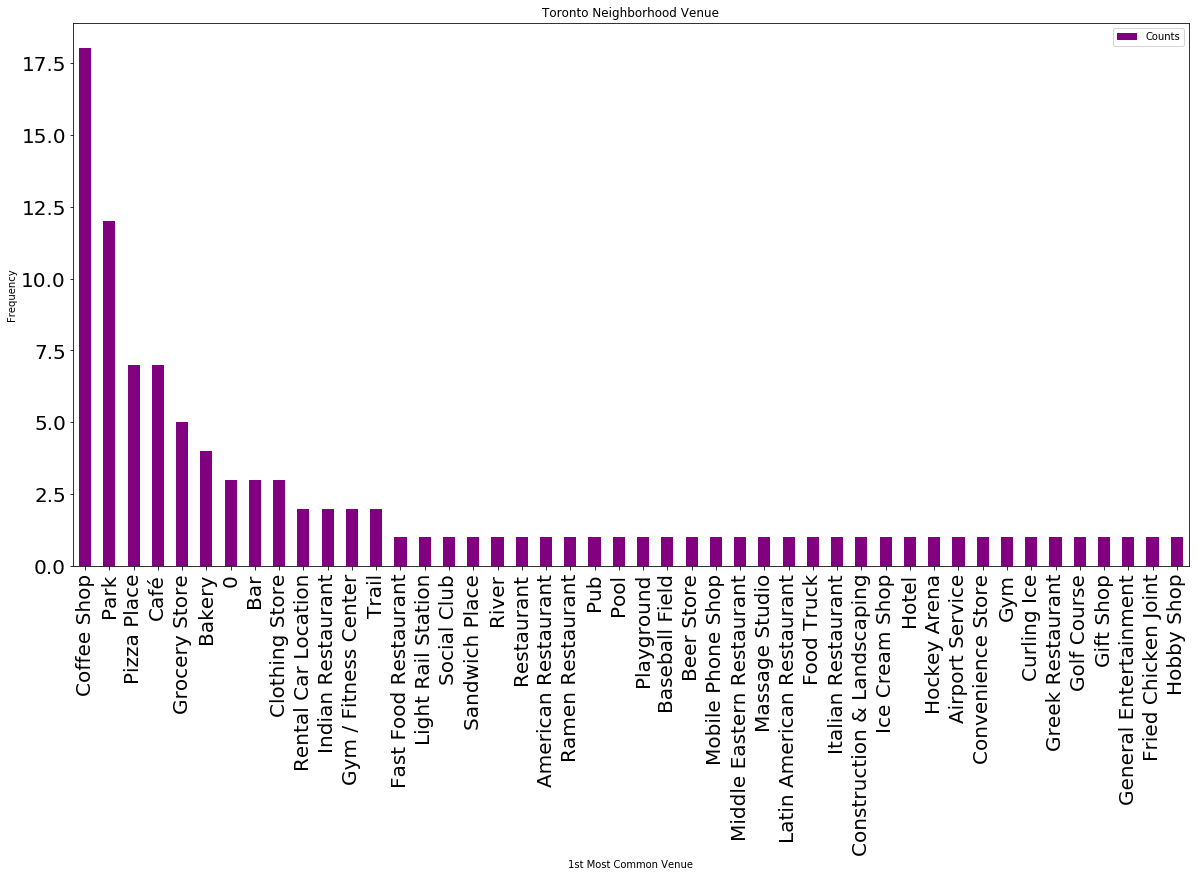

In [84]:
# Visualizing the Most Common Venue for both the datasets and then finding the neighborhoods close to them
#Plotting the most common venues of Toronto on a bar chart
toronto_sorted.plot(kind='bar',figsize = (20,10), fontsize = 20, color='purple')
plt.ylabel('Frequency')
plt.title('Toronto Neighborhood Venue')
plt.show()



In [85]:
#Getting the neighborhoods for the top 4 most common venues
# list_top_venues based on my interests
list_top_venues = ['Gym / Fitness Center','Park','Trail', 'Pool']
print('-------------------------------------------------------')
for venue in list_top_venues:
    print('The nearest neighborhood to the ' + venue + ' is : ')
    locator = toronto_new_df.loc[toronto_new_df['1st Most Common Venue'] == venue]
    print(locator['Neighborhood'].values)
    print('---------------------------------------------------')

-------------------------------------------------------
The nearest neighborhood to the Gym / Fitness Center is : 
['Don Mills North' 'Downsview Northwest']
---------------------------------------------------
The nearest neighborhood to the Park is : 
["Agincourt North, L'Amoreaux East, Milliken, Steeles East"
 'York Mills West' 'Parkwoods' 'CFB Toronto, Downsview East'
 'East Toronto' 'Lawrence Park' 'Moore Park, Summerhill East' 'Rosedale'
 'Forest Hill North, Forest Hill West' 'Caledonia-Fairbanks'
 'Downsview, North Park, Upwood Park' 'Weston']
---------------------------------------------------
The nearest neighborhood to the Trail is : 
['The Beaches' 'Humewood-Cedarvale']
---------------------------------------------------
The nearest neighborhood to the Pool is : 
['Hillcrest Village']
---------------------------------------------------


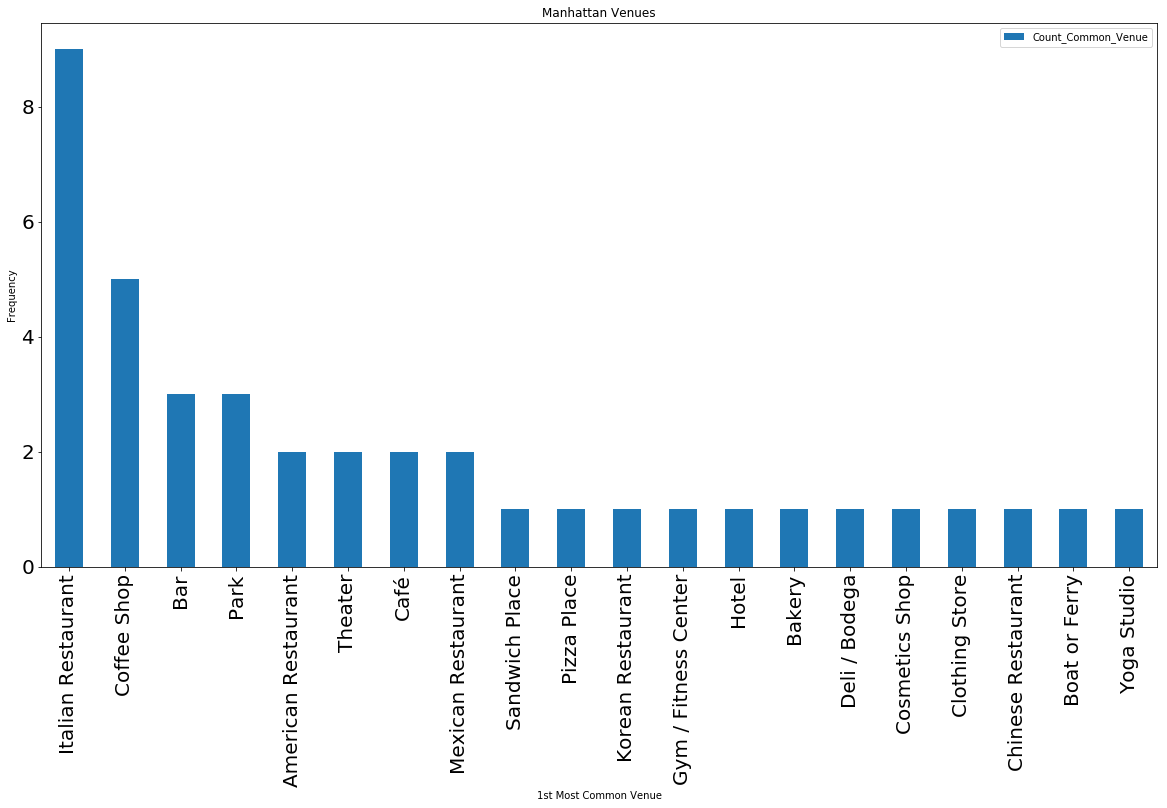

In [86]:
#Plotting the most common venues of Manhattan on a bar chart
manhattan_sorted.plot(kind='bar', figsize = (20,10), fontsize = 20)
plt.ylabel('Frequency')
plt.title('Manhattan Venues')
plt.show()

In [87]:
#Getting the neighborhoods of Manhattan for the top 4 most common venues
# list_top_venues based on my interests
list_top_venues = ['Park','Boat or Ferry','Yoga Studio', 'Gym / Fitness Center']
print('-------------------------------------------------------')
for venue in list_top_venues:
    print('The nearest neighborhood to the ' + venue + ' is : ')
    locator = manhattan_new.loc[manhattan_new['1st Most Common Venue'] == venue]
    print(locator['Neighborhood'].values)
    print('---------------------------------------------------')

-------------------------------------------------------
The nearest neighborhood to the Park is : 
['Morningside Heights' 'Battery Park City' 'Tudor City']
---------------------------------------------------
The nearest neighborhood to the Boat or Ferry is : 
['Stuyvesant Town']
---------------------------------------------------
The nearest neighborhood to the Yoga Studio is : 
['Flatiron']
---------------------------------------------------
The nearest neighborhood to the Gym / Fitness Center is : 
['Civic Center']
---------------------------------------------------
